In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost

#### Reading the data 


In [2]:
diabetes = pd.read_csv("diabetic_data.csv",na_values=['?'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Dimensions of the data

In [3]:
print(diabetes.shape)

(101766, 50)


#### Structure of the data

In [4]:
diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

#### Missing values

In [5]:
diabetes.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
# Dropping the columns with missing values more than 50%
diabetes = diabetes.drop(['medical_specialty','payer_code','weight'],1) 

In [7]:
# Data Types
diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [8]:
diabetes.shape

(101766, 47)

#### Numerical attributes

In [9]:
diabetes_num_attr = diabetes.iloc[:,[0,1,8,9,10,11,12,13,14,18]]
diabetes_num_attr.dtypes

encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

#### Categorical attributes

In [10]:
diabetes_cat_attr = diabetes.iloc[:,[2,3,4,5,6,7,15,16,17,19,20,21,22,23,24,25,26,27,28,
                                     29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

diabetes_cat_attr.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
diag_1                      object
diag_2                      object
diag_3                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin             

#### Chnaging the attribute types

In [11]:
# Categorical attributes
for i in diabetes_cat_attr:
    diabetes_cat_attr[i] = diabetes[i].astype('category')
diabetes_cat_attr.dtypes

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide                 category
pioglitazone                category
rosiglitazone               category
acarbose                    category
miglitol                    category
troglitazone                category
tolazamide                  category
examide                     category
c

In [12]:
# Levels in rach attribute
for i in diabetes_cat_attr:
    print(diabetes_cat_attr[i].value_counts())
    print('\n')

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


7     57494
1     29565
17     6781
4      3187
6  

#### Plots for Categorical attributes

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


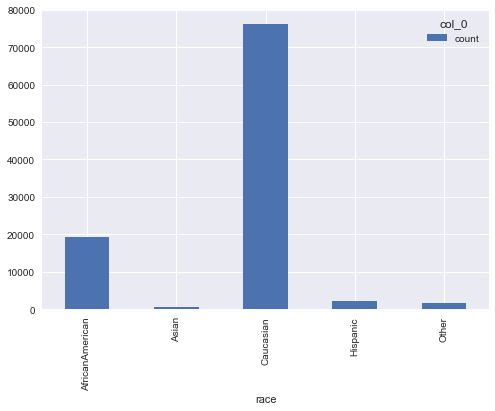

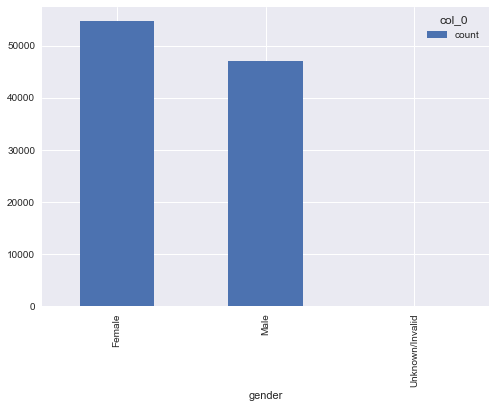

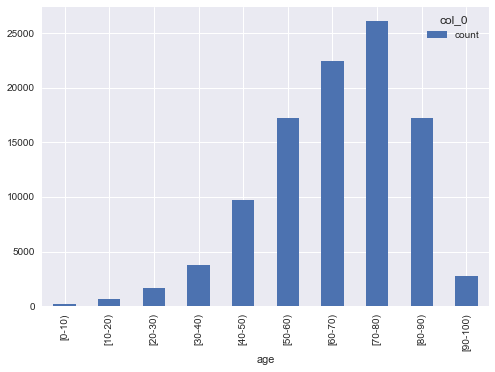

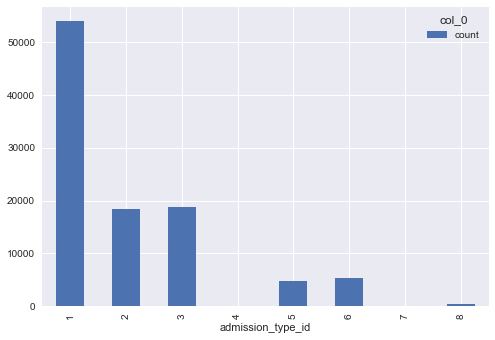

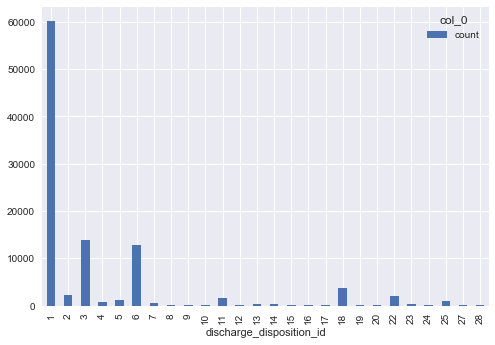

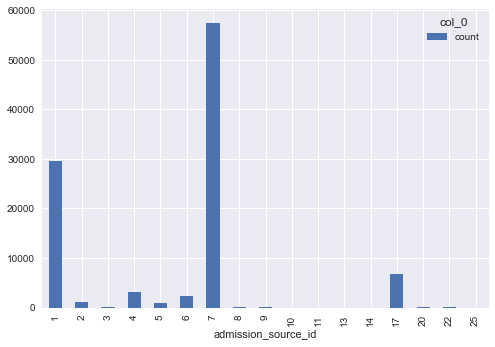

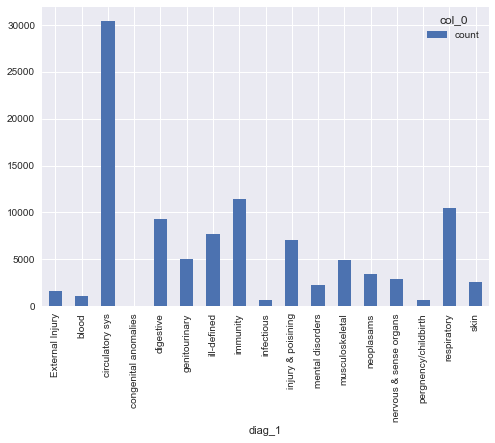

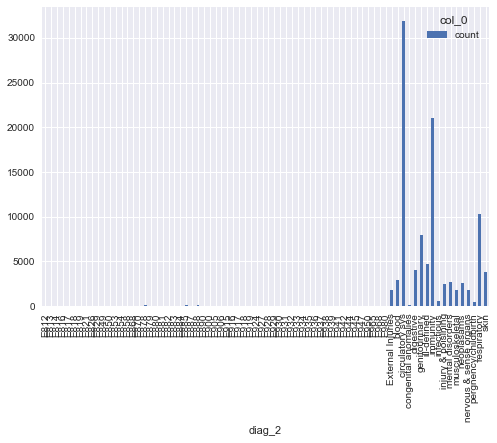

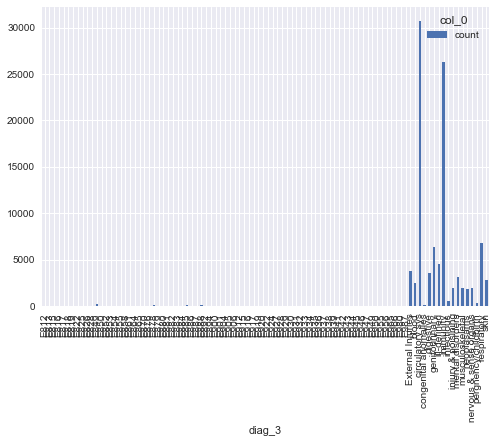

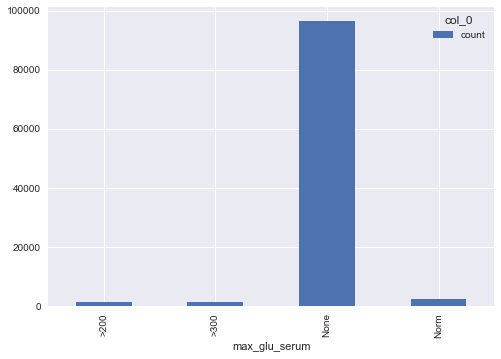

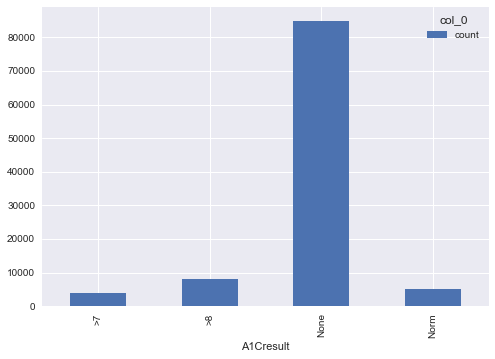

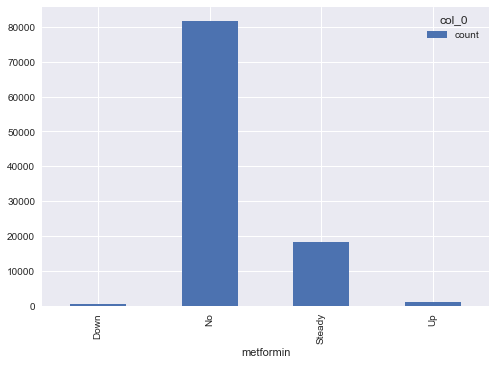

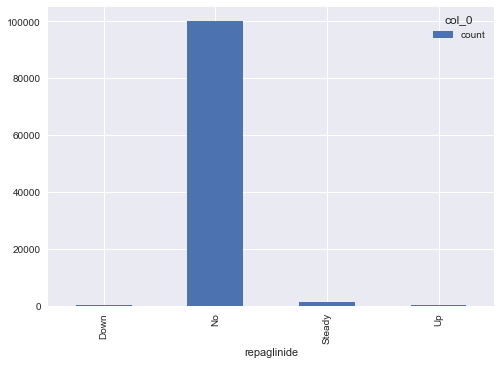

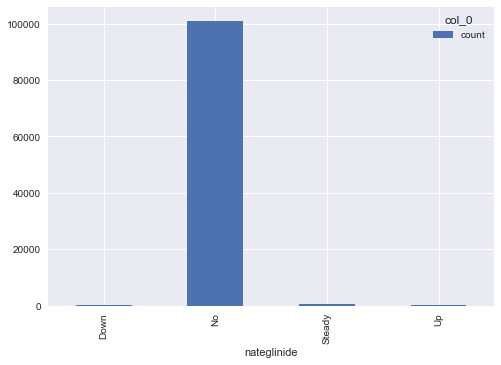

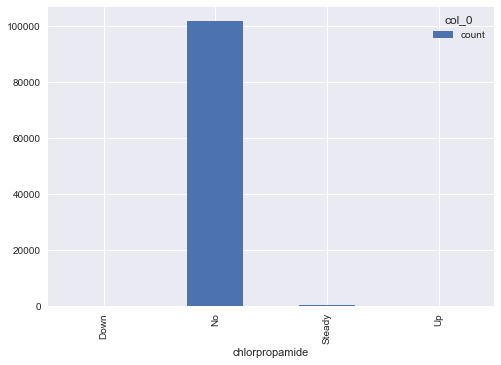

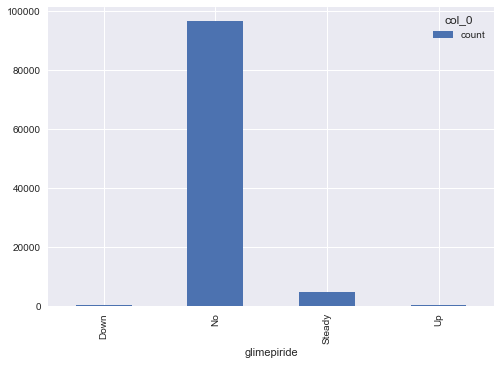

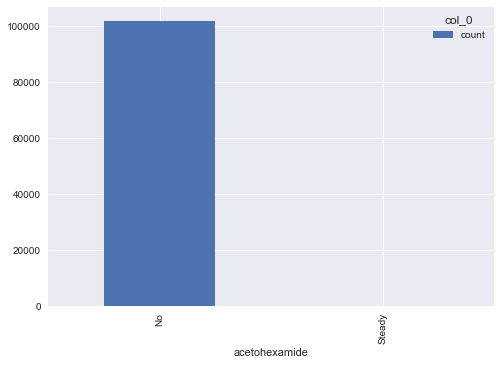

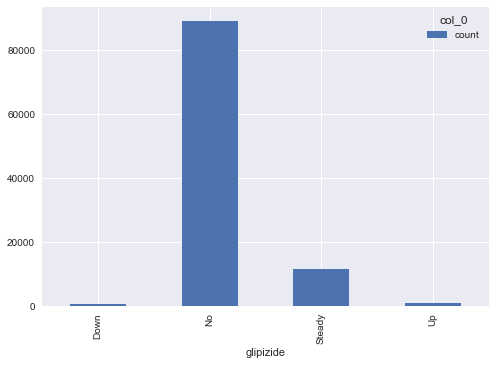

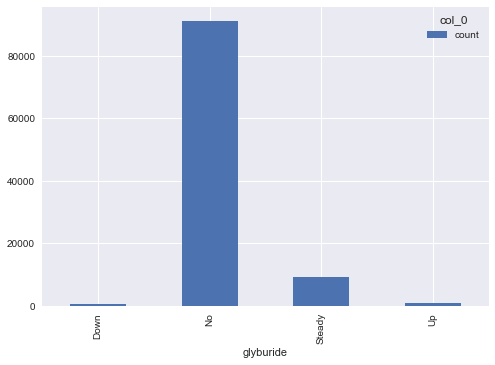

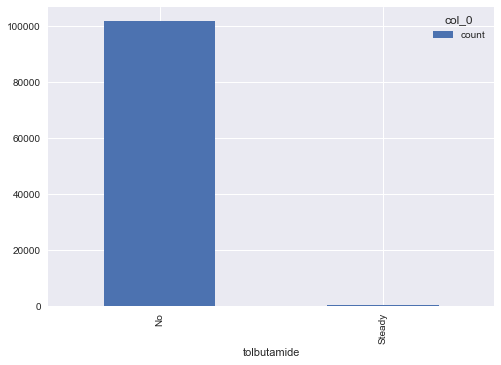

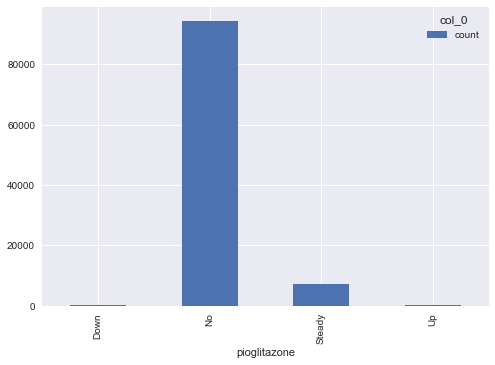

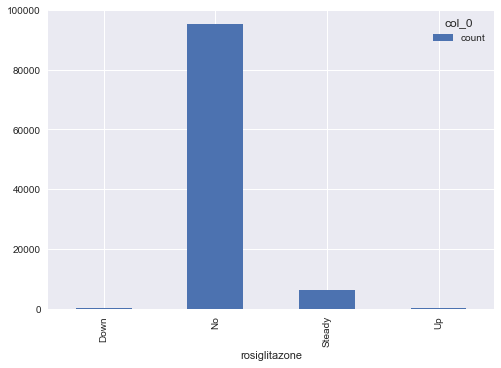

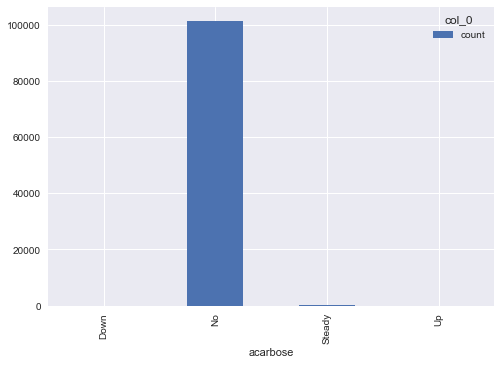

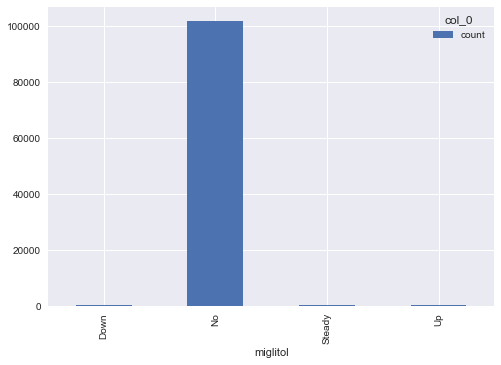

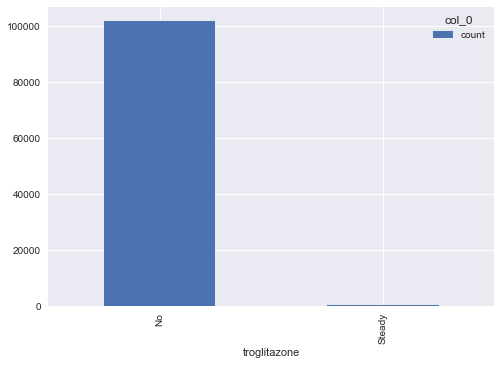

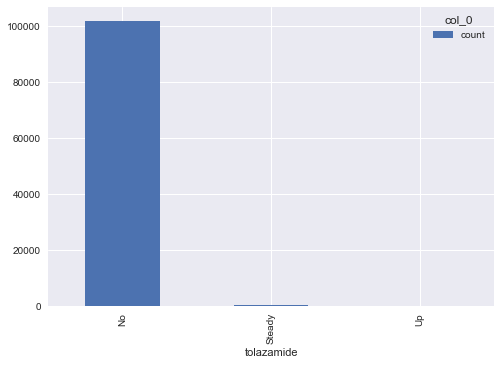

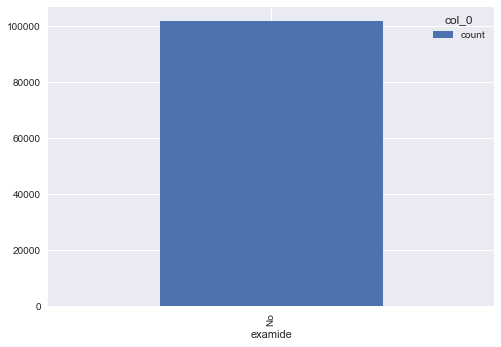

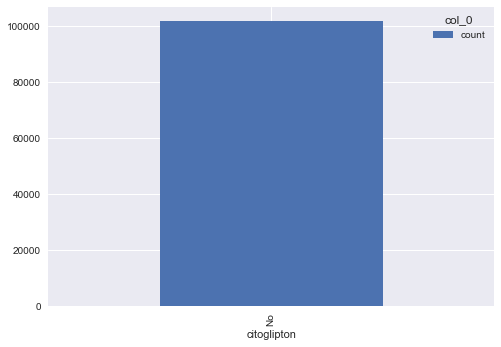

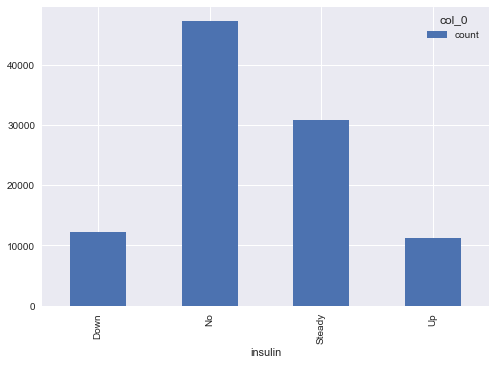

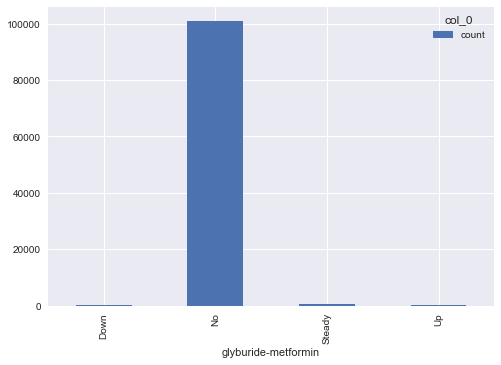

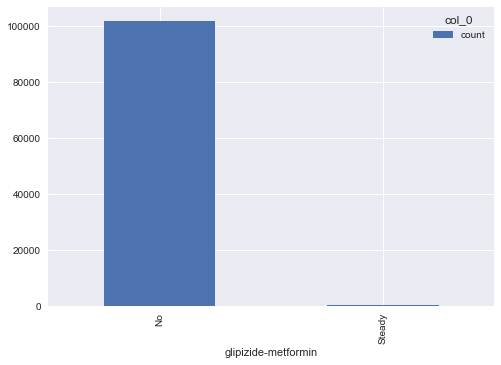

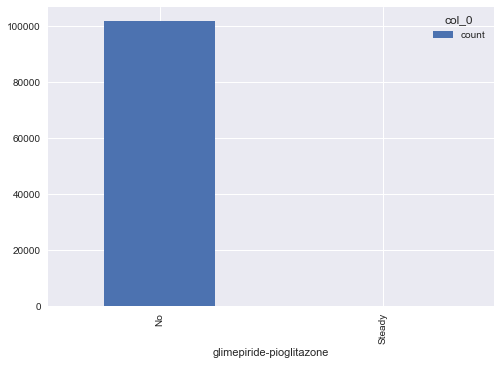

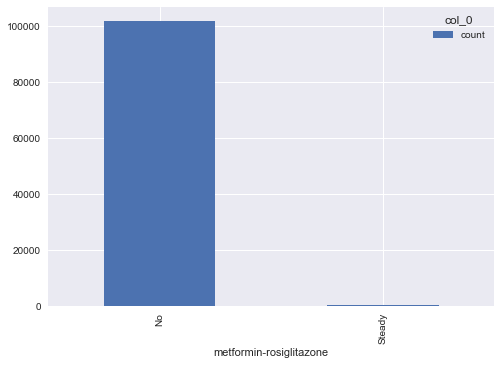

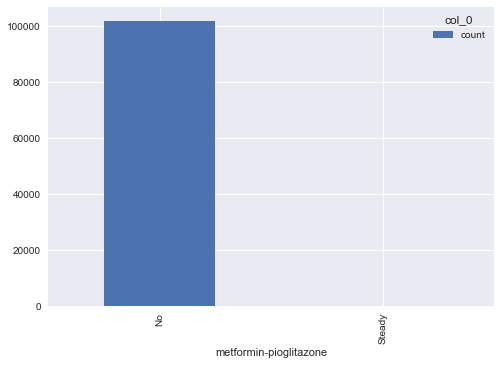

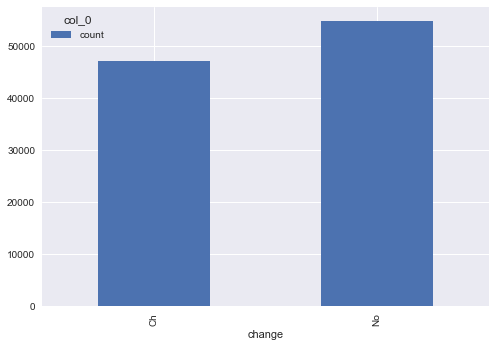

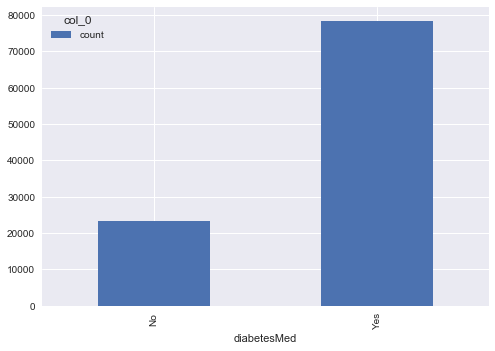

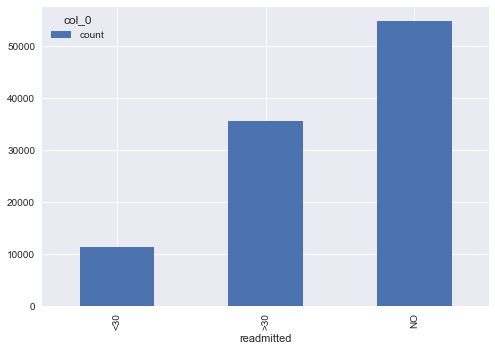

In [13]:
for i in diabetes_cat_attr:
     pd.crosstab(index = diabetes_cat_attr[i],columns="count").plot(kind="bar")

#### Numerical attributes

In [14]:
for i in diabetes_num_attr :
    diabetes_num_attr[i] = diabetes_num_attr[i].astype('int32')
diabetes_num_attr.dtypes

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


encounter_id          int32
patient_nbr           int32
time_in_hospital      int32
num_lab_procedures    int32
num_procedures        int32
num_medications       int32
number_outpatient     int32
number_emergency      int32
number_inpatient      int32
number_diagnoses      int32
dtype: object

In [15]:
# correlation matrix
cor = diabetes_num_attr.corr()
cor

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
time_in_hospital,-0.062221,-0.024092,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,0.082803,0.062352,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.030962,0.012480,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.265149,0.226847,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


#### Correlation plot

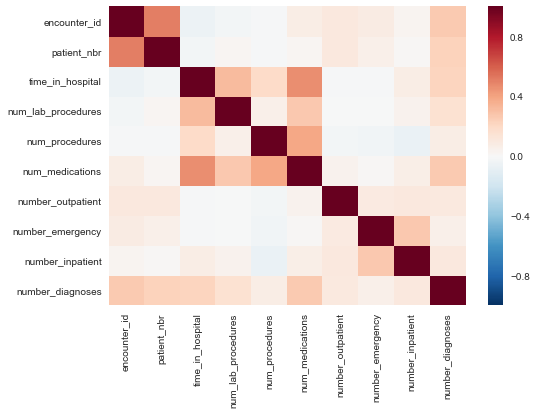

In [16]:
sns.heatmap(cor)

#### Histograms for numerical attributes

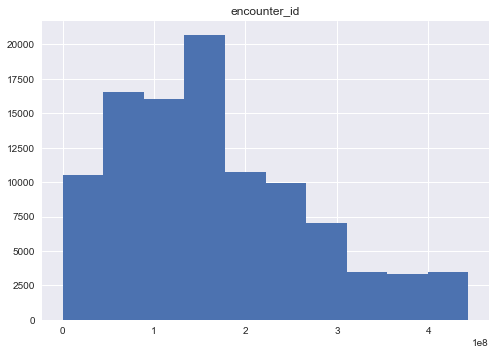

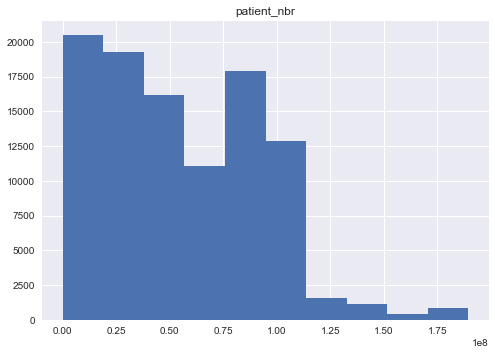

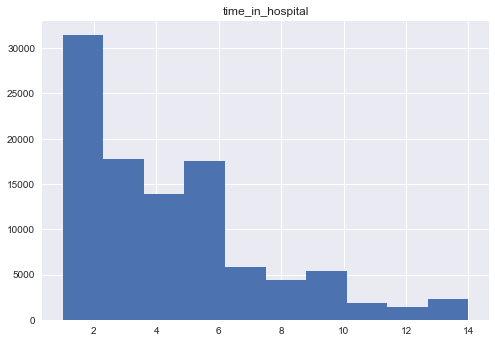

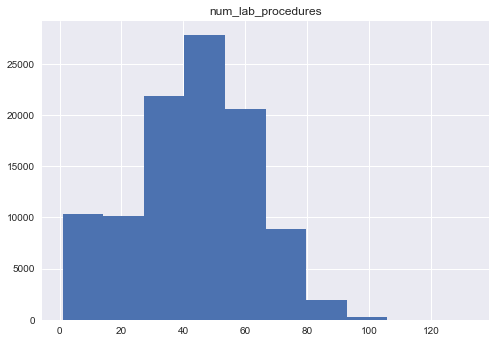

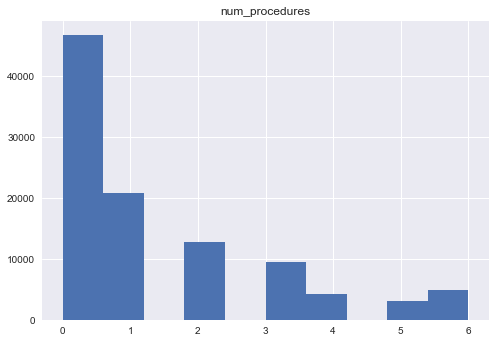

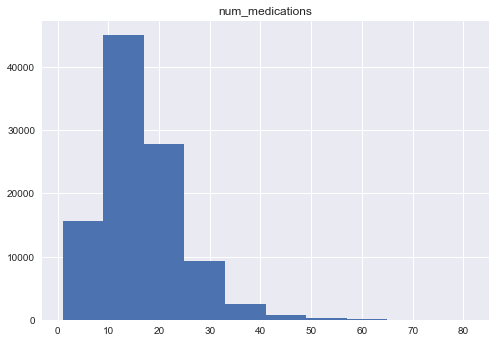

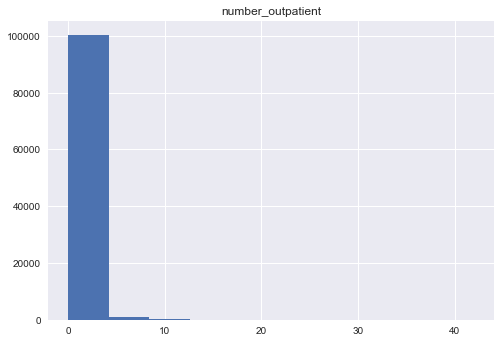

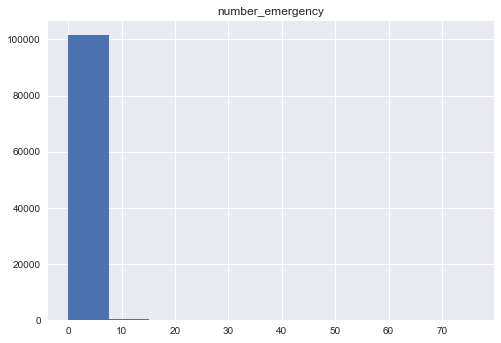

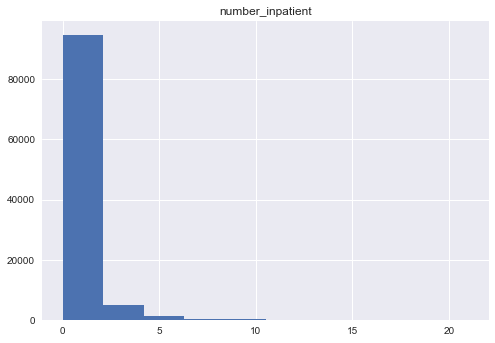

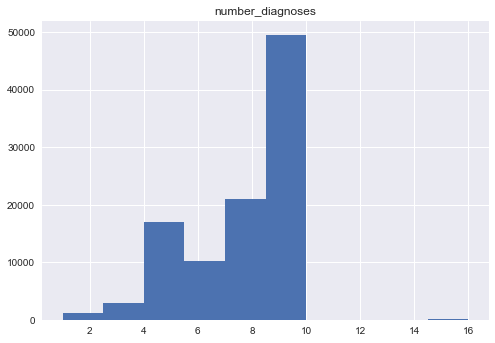

In [17]:
for i in diabetes_num_attr:
    diabetes_num_attr.hist(i)

#### Feature Engineering

In [18]:
diabetes_num_attr['Total_Procedures'] = diabetes_num_attr.num_lab_procedures + diabetes_num_attr.num_procedures

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
# Removing the Features which has Unique variables 
diabetes_num_attr = diabetes_num_attr.drop(['num_lab_procedures','num_procedures',
                                            'encounter_id','patient_nbr'],1)

#### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler().fit(diabetes_num_attr)

In [22]:
std = pd.DataFrame(scaler.transform(diabetes_num_attr),columns=diabetes_num_attr.columns)
std

,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Total_Procedures
0,-1.137649,-1.848268,-0.291461,-0.212620,-0.503276,-3.321596,-0.173097
1,-0.467653,0.243390,-0.291461,-0.212620,-0.503276,0.815784,0.733864
2,-0.802651,-0.371804,1.286748,-0.212620,0.288579,-0.735733,-1.432764
3,-0.802651,-0.002688,-0.291461,-0.212620,-0.503276,-0.218561,0.028450
4,-1.137649,-0.986997,-0.291461,-0.212620,-0.503276,-1.252906,0.330770
5,-0.467653,-0.002688,-0.291461,-0.212620,-0.503276,0.815784,-0.374644
6,-0.132655,0.612506,-0.291461,-0.212620,-0.503276,-0.218561,1.338504
7,0.202343,-0.494842,-0.291461,-0.212620,-0.503276,0.298612,1.439277
8,2.882327,1.473776,-0.291461,-0.212620,-0.503276,0.298612,1.288117
9,2.547329,0.243390,-0.291461,-0.212620,-0.503276,0.298612,-0.425031


#### Combining numerical and categorical attributes 

In [23]:
a = [std,diabetes_cat_attr]

diabetes_new = pd.concat(a,axis=1)
print(diabetes_new.shape) # Dimensions 
print(diabetes_new.dtypes) # Type 

(101766, 44)
time_in_hospital             float64
num_medications              float64
number_outpatient            float64
number_emergency             float64
number_inpatient             float64
number_diagnoses             float64
Total_Procedures             float64
race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide              

#### Droping the missing values

In [24]:
# We have a lot of data, instead of imputing(knn,softimpute) we simply drop the NAN values, So that we are more accurate.
diabetes_new = diabetes_new.dropna()

In [25]:
print(diabetes_new.shape)
print(diabetes_new.dtypes)
print(diabetes_new.isnull().sum())

(98053, 44)
time_in_hospital             float64
num_medications              float64
number_outpatient            float64
number_emergency             float64
number_inpatient             float64
number_diagnoses             float64
Total_Procedures             float64
race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide               

In [26]:
# Removing the variables with no variance
diabetes_new = diabetes_new.drop(['examide','citoglipton'],1)

In [27]:
# Shape of the data after removing variables
diabetes_new.shape

(98053, 42)

#### Replacing string with codes in categorical variables

In [28]:
s= ['admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'race', 'gender',
       'age', 'admission_type_id', 'discharge_disposition_id', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride',
       'chlorpropamide', 'acetohexamide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide',  'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

for i in s :
    diabetes_new[i] = diabetes_new[i].cat.codes
for i in s : 
    diabetes_new[i] = diabetes_new[i].astype('category')  

#### Train Test and Validation Split

In [29]:
y = diabetes_new.readmitted # Target
x = diabetes_new.drop(['readmitted'],1) # independent

We divide the dataset into 

Train - On which we train our model

Validation - On which we "tune" our model

Test - which is used for testing

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,stratify = y)
x_train,x_val,y_train,y_val = train_test_split(xtrain, ytrain,test_size = 0.2,stratify = ytrain)

In [31]:
print(x_train.shape,y_train.shape) # 60 %  
print(x_val.shape,y_val.shape) # 20 % 
print(xtest.shape,ytest.shape) # 20 %

(62753, 41) (62753,)
(15689, 41) (15689,)
(19611, 41) (19611,)


#### Class Imbalance

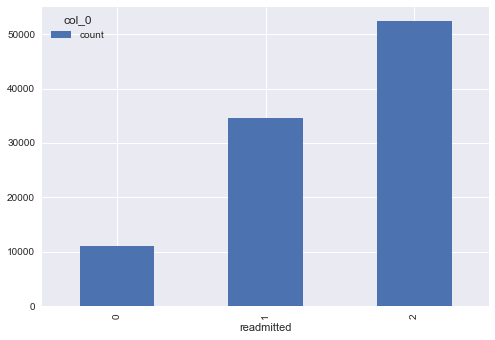

In [32]:
z = pd.crosstab(diabetes_new.readmitted,columns='count').plot(kind = 'bar') #  We have class imbalance.
plt.savefig('Class_Imbalance.jpg')

In [33]:
y_train.value_counts()

2    33496
1    22175
0     7082
Name: readmitted, dtype: int64

In [34]:
import imblearn # Imbalance learn is a package which is used to handle class imbalance

In [35]:
# SMOTE - Synthetic Minority Oversampling Technique : It uses K- Nearest Neighbours and oversamples the minority class.
from imblearn.over_sampling import SMOTE
samp = SMOTE() 

Note : We should apply SMOTE after the train,test and validation split, as it uses knn. We dont want our model to see the test instances.

In [36]:
x_resampled,y_resampled = samp.fit_sample(x_train,y_train) #Train 

In [37]:
# The output we get is numpy array, so we convert it to data frame.
x_resampled = pd.DataFrame(x_resampled,columns=x.columns)

In [38]:
y_resampled = pd.DataFrame(y_resampled,columns= ['readmitted'])

In [39]:
# We change the data type to category.
y_resampled = y_resampled.readmitted.astype('category')

In [40]:
y_resampled.value_counts() # Now we do not have the class imbalance.

2    33496
1    33496
0    33496
Name: readmitted, dtype: int64

In [41]:
x_resampled.shape # gives dimensions

(100488, 41)

In [42]:
for i in range(7,41) :
    x_resampled.iloc[:,i] = x_resampled.iloc[:,i].astype('category') 

In [43]:
x_resampled.dtypes # datatypes

time_in_hospital             float64
num_medications              float64
number_outpatient            float64
number_emergency             float64
number_inpatient             float64
number_diagnoses             float64
Total_Procedures             float64
race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide                 category
p

## Model Building

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(multi_class='multinomial',solver='newton-cg')
model.fit(x_resampled,y_resampled)

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

#### Predictions

In [46]:
val_pred = model.predict(x_val)

#### Confusion Matrix

In [47]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_val,y_pred=val_pred)

array([[ 698,  422,  651],
       [1630, 1528, 2386],
       [1651, 1550, 5173]], dtype=int64)

In [48]:
print("Classification Report: \n\n",metrics.classification_report(y_val,val_pred)) ### Validation Predictions

Classification Report: 

              precision    recall  f1-score   support

          0       0.18      0.39      0.24      1771
          1       0.44      0.28      0.34      5544
          2       0.63      0.62      0.62      8374

avg / total       0.51      0.47      0.48     15689



#### Test predictions

In [49]:
testprediction = model.predict(xtest)

In [50]:
print("Classification Report: \n\n",metrics.classification_report(ytest,testprediction))
metrics.accuracy_score(ytest,testprediction)

Classification Report: 

              precision    recall  f1-score   support

          0       0.18      0.40      0.25      2213
          1       0.44      0.27      0.34      6930
          2       0.63      0.63      0.63     10468

avg / total       0.51      0.48      0.48     19611



0.47631431339554331

#### Decision Tree


In [51]:
from sklearn import tree

In [52]:
tree_model = tree.DecisionTreeClassifier(min_samples_leaf= 1,criterion='entropy',max_depth=3)

In [53]:
tree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predictions

In [54]:
t = tree_model.fit(X=x_resampled,y=y_resampled)

In [55]:
tval_pred = tree_model.predict(x_val) # Validation Prediction

In [56]:
print("Classification Report: \n\n",metrics.classification_report(tval_pred,y_val))
print("Accuracy is",metrics.accuracy_score(y_val,tval_pred))

Classification Report: 

              precision    recall  f1-score   support

          0       0.27      0.21      0.23      2295
          1       0.25      0.43      0.31      3167
          2       0.75      0.61      0.67     10227

avg / total       0.58      0.52      0.54     15689

Accuracy is 0.516476512206


In [57]:
ttest_pred = tree_model.predict(xtest) # Test Prediction

In [58]:
print("Classification Report: \n\n",metrics.classification_report(ytest,ttest_pred))
print("Accuracy is",metrics.accuracy_score(ytest,ttest_pred))

Classification Report: 

              precision    recall  f1-score   support

          0       0.22      0.29      0.25      2213
          1       0.41      0.23      0.30      6930
          2       0.61      0.74      0.67     10468

avg / total       0.49      0.51      0.49     19611

Accuracy is 0.510784763653


#### SVM

In [59]:
from sklearn.svm import LinearSVC

In [60]:
svm_model = LinearSVC()

In [61]:
svm_model.fit(x_resampled,y_resampled)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Predictions

In [62]:
svm_pred = svm_model.predict(x_val) # Validation Predictions

In [63]:
print("Classification Report \n",metrics.classification_report(y_val,svm_pred))
print('accuracy:',metrics.accuracy_score(y_val,svm_pred))

Classification Report 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00      1771
          1       0.43      0.45      0.44      5544
          2       0.60      0.71      0.65      8374

avg / total       0.47      0.54      0.50     15689

accuracy: 0.537701574351


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
svm_test_pred = svm_model.predict(xtest) # Test Prediction

In [65]:
print("Classification Report: \n\n",metrics.classification_report(ytest,svm_test_pred))
print("Accuracy is",metrics.accuracy_score(ytest,svm_test_pred))

Classification Report: 

              precision    recall  f1-score   support

          0       0.00      0.00      0.00      2213
          1       0.43      0.44      0.43      6930
          2       0.60      0.72      0.65     10468

avg / total       0.47      0.54      0.50     19611

Accuracy is 0.537045535669


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
random_model = RandomForestClassifier(n_estimators=100,max_depth=10)

In [68]:
random_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predictions

In [69]:
random_pred = random_model.predict(x_val) # Validation Prediction

In [70]:
print("Classification Report: \n\n",metrics.classification_report(y_true=y_val,y_pred=random_pred))
print('Accuracy is',metrics.accuracy_score(y_val,random_pred))

Classification Report: 

              precision    recall  f1-score   support

          0       0.33      0.00      0.00      1771
          1       0.51      0.33      0.40      5544
          2       0.60      0.87      0.71      8374

avg / total       0.54      0.58      0.52     15689

Accuracy is 0.580151698642


In [71]:
random_pred1 = random_model.predict(xtest) # Test predcition

In [72]:
print("Classification Report: \n\n",metrics.classification_report(y_pred=random_pred1,y_true=ytest))
print('Accuracy is',metrics.accuracy_score(random_pred1,ytest))

Classification Report: 

              precision    recall  f1-score   support

          0       0.67      0.00      0.00      2213
          1       0.49      0.32      0.39      6930
          2       0.60      0.86      0.70     10468

avg / total       0.57      0.57      0.51     19611

Accuracy is 0.572841772475


### XGBoost

In [73]:
from xgboost import XGBClassifier

In [74]:
xg = XGBClassifier(objective='multi:softmax',num_class = 3,n_estimators=150,subsample=0.8,nthread=4)

In [75]:
xg.fit(np.array(x_resampled),np.array(y_resampled))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=4, num_class=3, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

#### Predictions

In [76]:
xg_vp = xg.predict(np.array(x_val)) # Validation Prediction

In [77]:
print("Classification Report: \n\n",metrics.classification_report(y_val,xg_vp))
print('Accuracy is',metrics.accuracy_score(xg_vp,y_val))

Classification Report: 

              precision    recall  f1-score   support

          0       0.29      0.04      0.07      1771
          1       0.51      0.36      0.42      5544
          2       0.61      0.84      0.71      8374

avg / total       0.54      0.58      0.53     15689

Accuracy is 0.579259353687


In [78]:
xp = xg.predict(np.array(xtest)) # Test Prediction

In [79]:
print("Classification Report: \n\n",metrics.classification_report(ytest,xp))
print('Accuracy is',metrics.accuracy_score(ytest,xp))

Classification Report: 

              precision    recall  f1-score   support

          0       0.40      0.06      0.10      2213
          1       0.50      0.35      0.41      6930
          2       0.61      0.83      0.70     10468

avg / total       0.55      0.58      0.53     19611

Accuracy is 0.576309214217


#### Majority Voting

In [80]:
s = [pd.DataFrame(ttest_pred),pd.DataFrame(random_pred1),
         pd.DataFrame(xp)] # Combining the predictions of models

In [81]:
Maj = pd.concat(s,1)

In [82]:
Maj_pred = Maj.mode(axis = 1)

In [83]:
mpred = Maj_pred.dropna(1)

#### Predictions

In [84]:
print("Classification Report: \n\n",metrics.classification_report(ytest,mpred)) 
print('Accuracy is',metrics.accuracy_score(mpred,ytest))

Classification Report: 

              precision    recall  f1-score   support

          0       0.31      0.08      0.12      2213
          1       0.50      0.32      0.39      6930
          2       0.60      0.84      0.70     10468

avg / total       0.53      0.57      0.53     19611

Accuracy is 0.569884248636


### Stacking

In [85]:
s_dt = t.predict(x_resampled) # Train predictions

In [86]:
s_rf = random_model.predict(x_resampled)# Train predictions

In [87]:
s_xg = xg.predict(np.array(x_resampled))# Train predictions

In [88]:
st = [pd.DataFrame(s_dt),pd.DataFrame(s_rf),pd.DataFrame(s_xg)] # test predictions of decision tree,random forest, xgboost
s_train = pd.concat(st,1)

In [89]:
s_test = Maj

In [90]:
s_test.shape

(19611, 3)

In [91]:
s_train.columns = ['dt','rf','xg']

In [92]:
random_model.fit(s_train,y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predictions

In [93]:
s_p = random_model.predict(s_test)

In [94]:
print(metrics.classification_report(s_p,ytest))
print('Accuracy:',metrics.accuracy_score(s_p,ytest))

             precision    recall  f1-score   support

          0       0.06      0.40      0.10       328
          1       0.35      0.50      0.41      4957
          2       0.83      0.61      0.70     14326

avg / total       0.70      0.57      0.62     19611

Accuracy: 0.574881444088


### MLP 

In [95]:
x_train.shape

(62753, 41)

In [96]:
tr = y_resampled

In [97]:
from keras.utils.np_utils import to_categorical
tr = to_categorical(tr)

Using TensorFlow backend.


In [98]:
tr.shape

(100488, 3)

In [99]:
from keras.layers import  Dense,Dropout,Input
from keras.models import Sequential,Model

In [100]:
model = Sequential()
model.add(Dense(150,input_dim = 41,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation = 'relu',))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               6300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 21,703
Trainable params: 21,703
Non-trainable params: 0
_________________________________________________________________


In [102]:
xtr = np.array(x_resampled)

In [103]:
xtr.shape # dimensions

(100488, 41)

In [104]:
model.fit(xtr,tr,batch_size=128,epochs = 20)

Epoch 1/20
100488/100488 [==============================] - 4s - loss: 1.2785 - acc: 0.3741     
Epoch 2/20
100488/100488 [==============================] - 3s - loss: 1.0689 - acc: 0.4112     
Epoch 3/20
100488/100488 [==============================] - 3s - loss: 1.0577 - acc: 0.4246     
Epoch 4/20
100488/100488 [==============================] - 3s - loss: 1.0525 - acc: 0.4316     
Epoch 5/20
100488/100488 [==============================] - 3s - loss: 1.0493 - acc: 0.4364     
Epoch 6/20
100488/100488 [==============================] - 3s - loss: 1.0455 - acc: 0.4416     
Epoch 7/20
100488/100488 [==============================] - 3s - loss: 1.0439 - acc: 0.4435     
Epoch 8/20
100488/100488 [==============================] - 3s - loss: 1.0412 - acc: 0.4476     
Epoch 9/20
100488/100488 [==============================] - 3s - loss: 1.0393 - acc: 0.4482     
Epoch 10/20
100488/100488 [==============================] - 3s - loss: 1.0357 - acc: 0.4539     
Epoch 11/20
100488/100488 [==

In [105]:
ya = to_categorical(y_val)

#### Predictions

In [106]:
model.evaluate(x=np.array(x_val),y=ya) # predictions

15584/15689 [============================>.] - ETA: 0s

[1.0609036863127526, 0.42456498184010499]

### Autoencoders

In [107]:

input_image = Input(shape = (41,))
corrupt_image = Dropout(0.5)(input_image)

#encode

encoded = Dense(150,activation = 'relu')(corrupt_image)

#decode

decoded = Dense(41, activation = 'relu')(encoded)

# Apply auto encoder 

autoencoder = Model(input_image,decoded)

autoencoder.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 41)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 41)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               6300      
_________________________________________________________________
dense_5 (Dense)              (None, 41)                6191      
Total params: 12,491
Trainable params: 12,491
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = autoencoder.fit(xtr,xtr,epochs = 7, batch_size=64,shuffle = True, verbose = 1)

Epoch 1/7
100488/100488 [==============================] - 5s - loss: 405.6206 - acc: 0.9698     
Epoch 2/7
100488/100488 [==============================] - 5s - loss: 347.7488 - acc: 0.9891     
Epoch 3/7
100488/100488 [==============================] - 5s - loss: 343.0777 - acc: 0.9891     
Epoch 4/7
100488/100488 [==============================] - 5s - loss: 343.3047 - acc: 0.9891     
Epoch 5/7
100488/100488 [==============================] - 5s - loss: 343.4174 - acc: 0.9891     
Epoch 6/7
100488/100488 [==============================] - 5s - loss: 341.1982 - acc: 0.9891     
Epoch 7/7
100488/100488 [==============================] - 5s - loss: 331.3733 - acc: 0.9891     


In [109]:
autoencoder.save('a1.h5') #saving weights

In [110]:
from keras.models import load_model
autoencoder1 = load_model('a1.h5') # Loading weights

In [111]:
encoder = Model(input_image,encoded)
htrain_data = encoder.predict(xtr)

In [112]:
htrain_data.shape # dimensions

(100488, 150)

In [113]:
input_image = Input(shape=(150,))
corrupt_image = Dropout(0.5)(input_image)
# encode
encode = Dense(100,activation='relu')(corrupt_image)
# Decode
decode = Dense(150,activation='relu')(encode)

# Autoencoder

autoencoder1 = Model(input_image,decode)
autoencoder1.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
autoencoder1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               15150     
Total params: 30,250
Trainable params: 30,250
Non-trainable params: 0
_________________________________________________________________


In [114]:
hist = autoencoder1.fit(htrain_data,htrain_data,batch_size=64,epochs=7)

Epoch 1/7
100488/100488 [==============================] - 7s - loss: 5791.8868 - acc: 0.6992     
Epoch 2/7
100488/100488 [==============================] - 6s - loss: 5688.0029 - acc: 0.9702     
Epoch 3/7
100488/100488 [==============================] - 6s - loss: 5684.4752 - acc: 0.9704     
Epoch 4/7
100488/100488 [==============================] - 6s - loss: 5682.8145 - acc: 0.9717     
Epoch 5/7
100488/100488 [==============================] - 7s - loss: 5681.4906 - acc: 0.9746     
Epoch 6/7
100488/100488 [==============================] - 7s - loss: 5681.2324 - acc: 0.9755     
Epoch 7/7
100488/100488 [==============================] - 7s - loss: 5680.6282 - acc: 0.9750     


In [115]:
autoencoder1.save('a2.h5') # loading weights

In [116]:
from keras.models import load_model
autoencoder1 = load_model('a2.h5')

In [117]:
mlp = Sequential()

mlp.add(Dropout(0.2,input_shape=(41,))) # Dropout layer which acts as regularization
mlp.add(Dense(150,activation = 'relu'))

mlp.add(Dropout(0.5))
mlp.add(Dense(100,activation = 'relu'))

mlp.add(Dropout(0.5))
mlp.add(Dense(3,  activation = 'softmax'))


mlp.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])


In [118]:
model.summary() # summary of the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               6300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 21,703
Trainable params: 21,703
Non-trainable params: 0
_________________________________________________________________


In [119]:
# setting weights
mlp.layers[1].set_weights(autoencoder.layers[2].get_weights()) 
mlp.layers[3].set_weights(autoencoder1.layers[2].get_weights()) 
# model fitting
mlp.fit(xtr,tr,batch_size = 128,
                 epochs = 7,verbose = 1)


Epoch 1/7
100488/100488 [==============================] - 5s - loss: 5.1521 - acc: 0.3368     
Epoch 2/7
100488/100488 [==============================] - 5s - loss: 1.1060 - acc: 0.3421     
Epoch 3/7
100488/100488 [==============================] - 4s - loss: 1.0992 - acc: 0.3468     
Epoch 4/7
100488/100488 [==============================] - 4s - loss: 1.0927 - acc: 0.3630     
Epoch 5/7
100488/100488 [==============================] - 5s - loss: 1.0865 - acc: 0.3766     
Epoch 6/7
100488/100488 [==============================] - 5s - loss: 1.0808 - acc: 0.3881     
Epoch 7/7
100488/100488 [==============================] - 4s - loss: 1.0766 - acc: 0.3983     


### Approach 2

Took the important features from Random Forest.

In [120]:
new = x_resampled
new_test = xtest

In [121]:
new = new.drop(['repaglinide',  'chlorpropamide', 'glimepiride',
       'acetohexamide', 'tolbutamide','pioglitazone',  'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],1)
# Important features
new_test = new_test.drop(['repaglinide',  'chlorpropamide', 'glimepiride',
       'acetohexamide', 'tolbutamide','pioglitazone',  'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],1)

### Logistic Regression

In [122]:
log_model = LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [123]:
log_model.fit(new,y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

#### Predictions

In [124]:
lp = log_model.predict(new_test)

In [125]:
print(metrics.classification_report(ytest,lp))
print('Accuracy:',metrics.accuracy_score(ytest,lp))

             precision    recall  f1-score   support

          0       0.18      0.40      0.25      2213
          1       0.43      0.27      0.34      6930
          2       0.63      0.63      0.63     10468

avg / total       0.51      0.48      0.48     19611

Accuracy: 0.475804395492


### XGBoost

In [126]:
xg = XGBClassifier(objective='multi:softmax',num_class = 3,n_estimators=150,subsample=0.8,min_child_weight=1,max_depth=5,nthread=4)

In [127]:
xg.fit(np.array(new),np.array(y_resampled))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=4, num_class=3, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

#### Predictions

In [128]:
xp = xg.predict(np.array(new_test))

In [129]:
print(metrics.classification_report(xp,ytest))
print('Accuracy:',metrics.accuracy_score(xp,ytest))

             precision    recall  f1-score   support

          0       0.04      0.42      0.08       226
          1       0.38      0.50      0.43      5342
          2       0.82      0.61      0.70     14043

avg / total       0.69      0.58      0.62     19611

Accuracy: 0.577584008975


### Approach 3


In this approach, target variable is made to binary class from multiclass 

Target as Yes or No.

Target as >30 or <30.


### Target: Yes/No

In [130]:
c = y

In [131]:
c = c.replace(0,1) # Replacing >30 and <30 to Yes

In [132]:
c.value_counts() # levels

2    52338
1    45715
0        0
Name: readmitted, dtype: int64

In [133]:
c = c.cat.remove_unused_categories()

In [134]:
c.value_counts()

2    52338
1    45715
dtype: int64

In [135]:
# Test train and validation split
a_xt,a_xte,a_yt,a_yte = train_test_split(x,c,test_size = 0.2)
xtra,xte,ytra,yte = train_test_split(a_xt,a_yt,test_size = 0.2)

### Logistic

In [136]:
l = LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [137]:
l.fit(xtra,ytra)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

#### Predictions

In [138]:
lpred = l.predict(xte)

In [139]:
print(metrics.classification_report(yte,lpred))
print('Accuracy:',metrics.accuracy_score(yte,lpred))

             precision    recall  f1-score   support

          1       0.64      0.42      0.50      7266
          2       0.61      0.80      0.69      8423

avg / total       0.63      0.62      0.61     15689

Accuracy: 0.620817133023


### Random Forest

In [140]:
random_model.fit(xtra,ytra)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predictions

In [141]:
rpred = random_model.predict(xte)

In [142]:
print(metrics.classification_report(y_pred=rpred,y_true=yte))
print('Accuracy is ',metrics.accuracy_score(yte,rpred))

             precision    recall  f1-score   support

          1       0.64      0.49      0.56      7266
          2       0.63      0.76      0.69      8423

avg / total       0.64      0.64      0.63     15689

Accuracy is  0.635668302632


### MLP

In [143]:
d = c

In [144]:
d = d.replace(1,0)

In [145]:
d = d.replace(2,1)

In [146]:
model = Sequential()
model.add(Dense(150,input_dim = 41,activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(100,activation = 'sigmoid',))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [147]:
c.cat.categories

Int64Index([1, 2], dtype='int64')

In [148]:
model.fit(np.array(x),to_categorical(d),batch_size=128)

Epoch 1/10
98053/98053 [==============================] - 3s - loss: 0.6687 - acc: 0.5864     
Epoch 2/10
98053/98053 [==============================] - 3s - loss: 0.6571 - acc: 0.6101     
Epoch 3/10
98053/98053 [==============================] - 3s - loss: 0.6544 - acc: 0.6129     
Epoch 4/10
98053/98053 [==============================] - 3s - loss: 0.6517 - acc: 0.6160     
Epoch 5/10
98053/98053 [==============================] - 3s - loss: 0.6492 - acc: 0.6198     
Epoch 6/10
98053/98053 [==============================] - 3s - loss: 0.6474 - acc: 0.6215     
Epoch 7/10
98053/98053 [==============================] - 3s - loss: 0.6459 - acc: 0.6207     
Epoch 8/10
98053/98053 [==============================] - 3s - loss: 0.6441 - acc: 0.6228     
Epoch 9/10
98053/98053 [==============================] - 3s - loss: 0.6425 - acc: 0.6240     
Epoch 10/10
98053/98053 [==============================] - 3s - loss: 0.6416 - acc: 0.6252     


In [149]:
f = yte

In [150]:
f = f.replace(1,0)

In [151]:
f = f.replace(2,1)

#### Predictions

In [152]:
model.evaluate(np.array(xte),to_categorical(f))

14720/15689 [===========================>..] - ETA: 0s

[0.63468037983816361, 0.63423417681557814]

In [153]:
a = model.predict_classes(np.array(xte))

14368/15689 [==========================>...] - ETA: 0s

In [154]:
print(metrics.classification_report(f,a))
print(metrics.accuracy_score(f,a))

             precision    recall  f1-score   support

          0       0.62      0.54      0.58      7266
          1       0.64      0.71      0.68      8423

avg / total       0.63      0.63      0.63     15689

0.634202307349


### Target:  >30 Days / <30 Days

In [155]:
d = y

In [156]:
d = d.replace(2,np.NAN)

In [157]:
r = [x,d]
r = pd.concat(r,1)

In [158]:
r = r.dropna(axis=0)

In [159]:
r.shape

(45715, 42)

In [160]:
xa  = r.drop('readmitted',axis=1)
ya = r.readmitted

In [161]:
# Train test split
xtrains,xtests,ytrains,ytests = train_test_split(xa,ya,test_size = 0.2)

### Logistic

In [162]:
log_model.fit(xtrains,ytrains)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

#### Predictions

In [163]:
ll = log_model.predict(xtests)

In [164]:
print(metrics.classification_report(ll,ytests))
print('accuracy is ',metrics.accuracy_score(ytests,ll))

             precision    recall  f1-score   support

          0       0.02      0.60      0.03        58
          1       1.00      0.76      0.86      9085

avg / total       0.99      0.76      0.86      9143

accuracy is  0.759269386416


### Random Forest

In [165]:
random_model.fit(xtrains,ytrains)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predictions

In [166]:
rpp = random_model.predict(xtests)

In [167]:
print(metrics.classification_report(rpp,ytests))
print('accuracy is ',metrics.accuracy_score(ytests,rpp))

             precision    recall  f1-score   support

          0       0.01      0.80      0.01        15
          1       1.00      0.76      0.86      9128

avg / total       1.00      0.76      0.86      9143

accuracy is  0.758941266543


### MLP

In [168]:
model = Sequential()
model.add(Dense(150,input_dim = 41,activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(100,activation = 'sigmoid',))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [169]:
model.fit(np.array(xtrains),to_categorical(ytrains))

Epoch 1/10
36572/36572 [==============================] - 2s - loss: 0.5534 - acc: 0.7558     
Epoch 2/10
36572/36572 [==============================] - 2s - loss: 0.5476 - acc: 0.7579     
Epoch 3/10
36572/36572 [==============================] - 2s - loss: 0.5462 - acc: 0.7581     
Epoch 4/10
36572/36572 [==============================] - 2s - loss: 0.5457 - acc: 0.7581     
Epoch 5/10
36572/36572 [==============================] - 2s - loss: 0.5451 - acc: 0.7580     
Epoch 6/10
36572/36572 [==============================] - 2s - loss: 0.5445 - acc: 0.7583     
Epoch 7/10
36572/36572 [==============================] - 2s - loss: 0.5442 - acc: 0.7581     
Epoch 8/10
36572/36572 [==============================] - 2s - loss: 0.5437 - acc: 0.7582     
Epoch 9/10
36572/36572 [==============================] - 2s - loss: 0.5432 - acc: 0.7585     
Epoch 10/10
36572/36572 [==============================] - 2s - loss: 0.5430 - acc: 0.7581     


In [170]:
model.evaluate(np.array(xtests),to_categorical(ytests))#Predictions

8128/9143 [=========================>....] - ETA: 0s

[0.54084882641808674, 0.75932407304180094]